In [1]:
import wordcloud

import pandas as pd
import numpy as np

import random
import re
from collections import Counter
import time
import pickle
import operator

from pymongo import MongoClient

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.preprocessing import Normalizer
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize, wordpunct_tokenize, WhitespaceTokenizer

In [2]:
names = nltk.corpus.names
male_names = names.words('male.txt')
female_names = names.words('female.txt')
male_names = [w.lower() for w in male_names]
male_names_plur = [(w.lower() + "s") for w in male_names]
female_names_plur = [(w.lower() + "s") for w in female_names]
female_names = [w.lower() for w in female_names]
stopwords = nltk.corpus.stopwords.words('english')

In [3]:
selected_words = ['',
                  'laughter',
                  'applause',
                  'aa',
                  'aaa',
                  'aaaaa',
                  'aaaaaah',
                  'aaaah',
                  'aah',
                  'ab',
                  'ababa',
                  'abacha',
                  'aback',]

In [4]:
stoppers = set(list(stopwords) + list(selected_words) + list(ENGLISH_STOP_WORDS) + 
               list(female_names) + list(male_names) + list(female_names_plur) + list(male_names_plur))
stoppers = list(stoppers)

In [5]:
with open('master.pkl','rb') as p:
    comments = pickle.load(p)

In [8]:
TED_comments = comments[comments['TED=1'] == 1]
YT_comments = comments[comments['TED=1'] == 0]

In [9]:
TED_comment = [''.join(i) for i in TED_comments.comment]
YT_comment = [''.join(i) for i in YT_comments.comment]

In [13]:
TED_text = ','.join(TED_comment)
YT_text = ','.join(YT_comment)

In [15]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

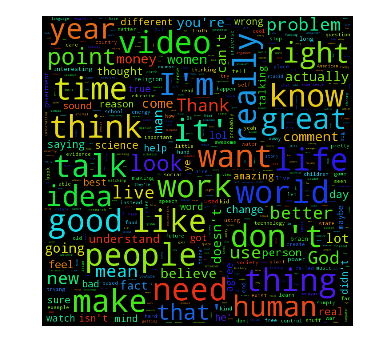

In [51]:
# Read the whole text.

# Generate a word cloud image

wc = WordCloud(width=700,
               height=700,
               margin=10,
               background_color="black", 
               max_words=500,
               max_font_size=70,
               stopwords=stopwords,
               mode='RGB').generate(YT_text)

stopwords = set(stoppers)
stopwords.add("said")

# # Display the generated image:
# # the matplotlib way:
# import matplotlib.pyplot as plt
# plt.imshow(wordcloud)
# plt.axis("off")

# lower max_font_size
# wordcloud = WordCloud(max_font_size=30).generate(YT_text)
plt.figure()
plt.imshow(wc)
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()